In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import japanize_matplotlib # 追加

## データの読み込みと確認

In [3]:
# データセットの読み込み
diabetes = load_diabetes()

# データの分析: データセット全体の情報を確認
data_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data_df['target'] = diabetes.target
print("データの基本情報:\n")
print(data_df.info())
print("\nデータの統計量:\n")
print(data_df.describe())

print("\nデータの一部を表示:\n")
print(data_df.head())

# データの変数: 項目名の出力
print("\nデータの変数:\n")
print(data_df.columns.tolist())

データの基本情報:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

データの統計量:

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164

## データの相関関係を把握する


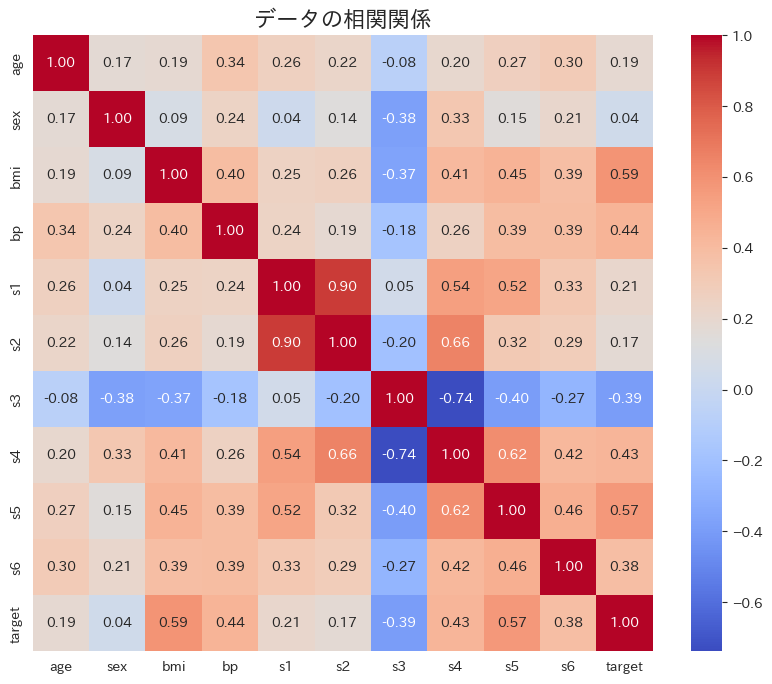

In [4]:
# データの相関関係: ヒートマップで可視化
correlation_matrix = data_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("データの相関関係", fontsize=16)
plt.show()

## 単回帰分析により回帰直線を作成する

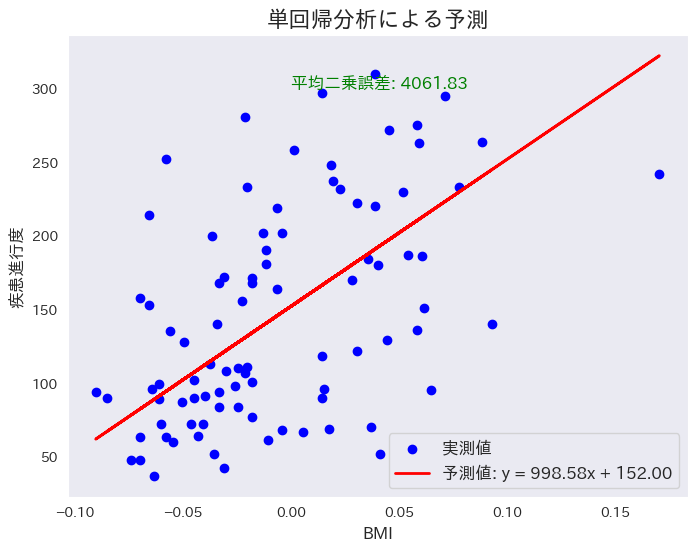

In [5]:
# 単回帰分析: BMIと疾患進行度の関係
X = diabetes.data[:, np.newaxis, 2]  # BMIのデータを使用
y = diabetes.target

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの作成と学習
model = LinearRegression()
model.fit(X_train, y_train)

# テストデータでの予測
y_pred = model.predict(X_test)

# 回帰直線の傾きと切片を取得
coef = model.coef_[0]
intercept = model.intercept_

# 平均二乗誤差を計算
mse = mean_squared_error(y_test, y_pred)

# グラフの描画
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", label="実測値")
plt.plot(X_test, y_pred, color="red", linewidth=2, label=f"予測値: y = {coef:.2f}x + {intercept:.2f}")
plt.title("単回帰分析による予測", fontsize=16)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("疾患進行度", fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.text(0, 300, f"平均二乗誤差: {mse:.2f}", fontsize=12, color="green")
plt.show()
